In [1]:
import sys
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns


current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)
src_dir = os.path.join(parent_dir, 'src')
sys.path.insert(0, src_dir)

from components_and_factors.components_factors import ComponentsAndFactors

In [2]:
components_utils = ComponentsAndFactors()
imputed_dataframe = pd.read_csv('../assets/HFCO2_cleaned_and_imputed.csv')


In [3]:
# Se ecala la matriz y luego se convierte en dataframe
scaler = StandardScaler()
df_scaled = components_utils.get_data_frame_scaled(imputed_dataframe)

In [4]:
# Inicializamos y ajustamos el modelo de PCA
# No especificamos el número de componentes para obtener todos ellos
pca = PCA(n_components=df_scaled.shape[1])
principal_components_matrix = pca.fit_transform(df_scaled)

In [5]:
# Obtener los valores propios (varianza explicada por cada componente)
# Estos son equivalentes a los valores propios de la matriz de correlación
eigenvalues_pca = pca.explained_variance_

# Obtener los vectores propios (componentes principales)
eigenvectors_pca = pca.components_

In [6]:
print("Valores Propios (Varianza Explicada) para ACP:")
print(eigenvalues_pca)


Valores Propios (Varianza Explicada) para ACP:
[2.98929545 1.01247282 0.98827442 0.01036584 0.00342583]


In [7]:
# Presentación de matriz de varianza explicada y acumulada pro componente
explained_matrix = components_utils.get_explained_matrix(pca)
explained_matrix

,Varianza Explicada (%),Varianza Acumulada (%)
PC1,59.740096,59.740096
PC2,20.233939,79.974035
PC3,19.750342,99.724378
PC4,0.207158,99.931536
PC5,0.068464,100.000000


In [8]:
print("\nMatriz de Vectores Propios (Componentes Principales) para ACP:")
print(principal_components_matrix)


Matriz de Vectores Propios (Componentes Principales) para ACP:
[[ 2.33532794e+00 -1.78033144e+01  1.79404804e+01  1.03228305e-02
  -1.24890553e-02]
 [-9.75406004e-02 -1.62545963e-01 -2.16024346e-01 -5.23072055e-02
   2.48376989e-02]
 [-9.09650583e-02 -1.62704677e-01 -2.15831290e-01 -5.95444491e-02
   1.89945445e-02]
 ...
 [-9.75748867e-02 -1.60914415e-01 -2.14860414e-01 -5.21731287e-02
   2.46254951e-02]
 [-9.75686648e-02 -1.61439977e-01 -2.15371848e-01 -5.21707321e-02
   2.46272854e-02]
 [-1.04525601e-01  2.13501476e-01  1.49877165e-01 -5.91079107e-02
   2.70207123e-02]]


In [9]:
df_matrix_pca = pd.DataFrame(np.array(principal_components_matrix))

In [10]:
df_eigenvectors = pd.DataFrame(eigenvectors_pca)
df_eigenvectors

,0,1,2,3,4
0,0.577316,0.046808,0.576992,0.575811,-0.006103
1,0.033311,-0.694907,-0.014137,0.044854,0.716786
2,-0.030892,0.715026,0.016774,-0.036570,0.697255
3,-0.125982,0.052016,-0.636109,0.759456,-0.003788
4,0.805463,0.030748,-0.511825,-0.297184,0.000881


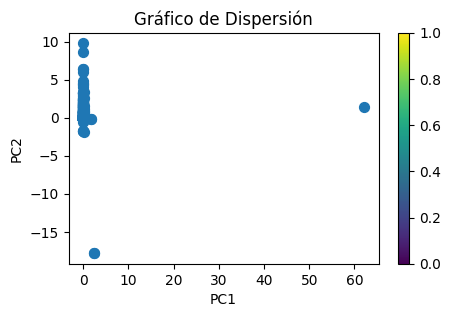

In [11]:
components_utils.plot_dispersion_diagram(df_matrix_pca)

In [15]:
from factor_analyzer import FactorAnalyzer

# This is the correct class name
fa = FactorAnalyzer(n_factors=2, rotation='varimax')

# Assuming df_scaled is your DataFrame with scaled data
fa.fit(df_scaled)

# Now, this line will work correctly
cargas_factoriales = fa.loadings_

/home/juanfgallo/.var/app/com.jetbrains.PyCharm-Community/data/python/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [16]:
# 4. Obtención de las cargas factoriales
# En el AF, la salida más importante no son los vectores propios, sino las cargas factoriales,
# que te dicen cuánto contribuye cada variable a cada factor latente.
factor_loadings = components_utils.get_loadings_fa(fa, df_scaled, n_factors)
print("\nCargas Factoriales (Factor Loadings) del Análisis Factorial:")
print(factor_loadings)

AttributeError: 'FactorAnalyzer' object has no attribute 'components_'

In [17]:
# ¿Qué información se puede extraer de los valores y vectores propios obtenidos?

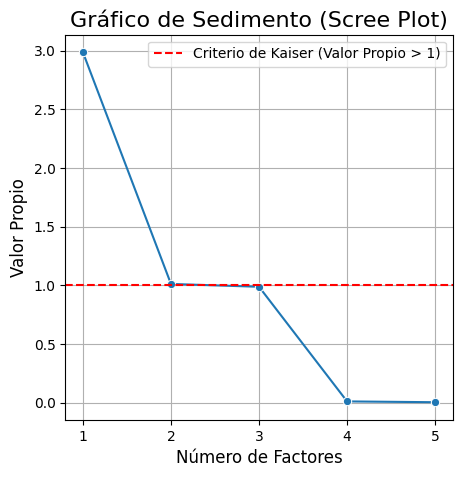

In [18]:

components_utils.plot_sediment_diagram(eigenvalues_fa)

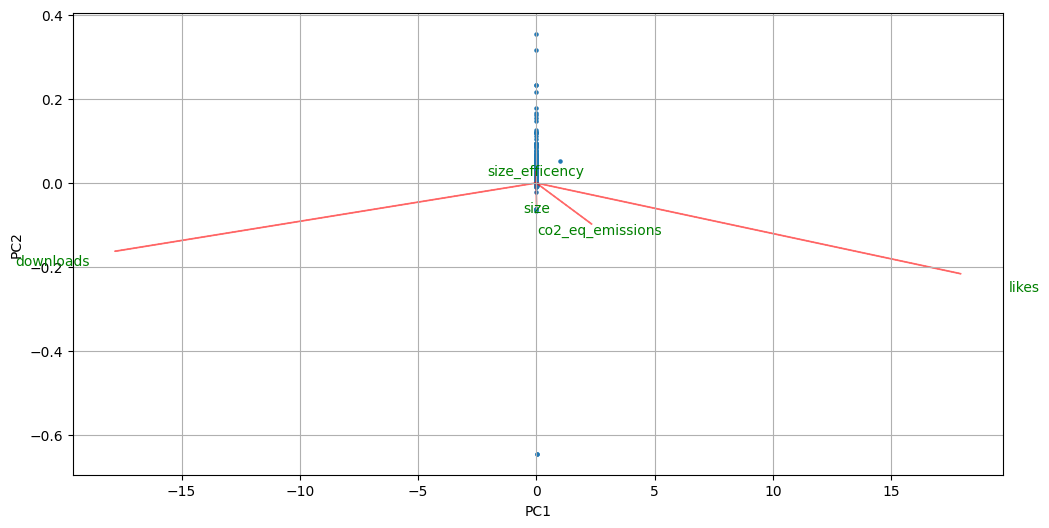

In [19]:
components_utils.plot_biplot_pca(principal_components_matrix, list(imputed_dataframe.columns))



In [21]:
imputed_dataframe

,co2_eq_emissions,downloads,likes,size,size_efficency
0,149200.000000,1172830,170,3.528337e+08,2.364837e+03
1,133.021988,14,0,3.081921e+08,2.316851e+06
2,126.344463,14,1,3.083194e+08,2.440308e+06
3,7.989145,45,0,4.380438e+08,5.482988e+07
4,55.101963,43,0,4.333314e+08,7.864173e+06
...,...,...,...,...,...
1300,0.401257,0,0,1.336520e+09,3.330836e+09
1301,0.015786,0,0,3.100225e+08,1.963898e+10
1302,3.673900,0,0,3.100225e+08,8.438513e+07
1303,5.741513,0,0,3.100225e+08,5.399666e+07


/home/juanfgallo/.var/app/com.jetbrains.PyCharm-Community/data/python/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/juanfgallo/.var/app/com.jetbrains.PyCharm-Community/data/python/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


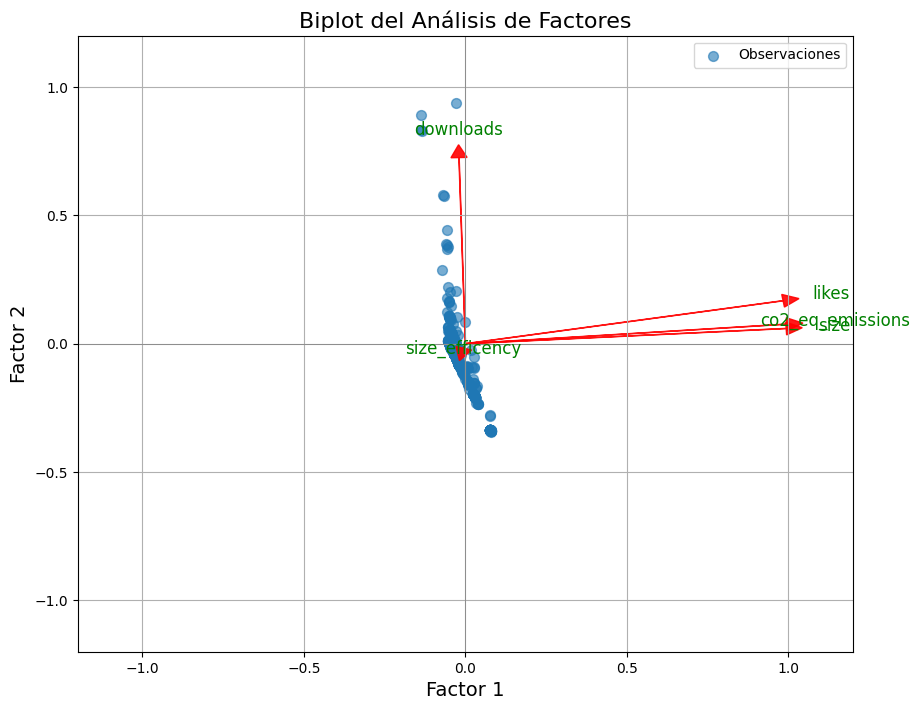

In [24]:
scaler = StandardScaler()

# La función fit_transform devuelve un array de NumPy.
# Lo convertimos de nuevo a DataFrame para mantener los nombres de las columnas.
df_scaled = pd.DataFrame(df_scaled, columns=imputed_dataframe.columns)

# --- Paso 3: Realiza el Análisis de Factores Principales ---
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(df_scaled)

# --- Paso 4: Obtén las cargas y puntuaciones ---
cargas_factoriales = fa.loadings_
puntuaciones_factoriales = fa.transform(df_scaled)

# --- Paso 5: Define la función biplot mejorada ---
# Esta función es más robusta y maneja mejor los diferentes tipos de datos.
def biplot_mejorado(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    plt.figure(figsize=(10, 8)) # Ajustar el tamaño del gráfico
    
    # Graficar las observaciones
    plt.scatter(xs, ys, s=50, alpha=0.6, label='Observaciones')
    
    # Asegurar que las cargas sean un array de NumPy
    if isinstance(coeff, pd.DataFrame):
        coeff = coeff.values
    
    # Graficar las flechas de las variables
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.9, head_width=0.05, head_length=0.05)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center', fontsize=12)
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center', fontsize=12)
    
    # Ajustar los límites de los ejes para una mejor visualización
    # Se utiliza un valor fijo para asegurarse de que las flechas se vean claramente
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    
    plt.xlabel("Factor 1", fontsize=14)
    plt.ylabel("Factor 2", fontsize=14)
    plt.title('Biplot del Análisis de Factores', fontsize=16)
    plt.grid()
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.legend()
    plt.show()

# --- Paso 6: Llama a la función con los resultados del análisis ---
biplot_mejorado(puntuaciones_factoriales, cargas_factoriales, labels=df_scaled.columns)